In [614]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from datetime import datetime

In [615]:
df = pd.read_csv('SUM_DATA.csv')
# df = pd.read_csv('data.csv')

In [616]:
df = df.drop('STORE', axis=1)

In [617]:
df.head()

,SALE_DT,SALES
0,2019-01,6.116698e+08
1,2019-02,6.254852e+08
2,2019-03,7.278651e+08
3,2019-04,6.499091e+08
4,2019-05,6.118044e+08


In [618]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,2019-01,6.116698e+08
1,2019-02,6.254852e+08
2,2019-03,7.278651e+08
3,2019-04,6.499091e+08
4,2019-05,6.118044e+08


In [619]:
df.shape

(42, 2)

In [620]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [621]:
df.tail()

,Month,Sales
37,2022-02,5.327292e+08
38,2022-03,7.537410e+08
39,2022-04,6.054326e+08
40,2022-05,5.480671e+08
41,2022-06,5.027106e+08


In [622]:
df.shape

(42, 2)

In [623]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [624]:
df['Month'] = pd.to_datetime(df['Month'])

In [625]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [626]:
df.head()

,Month,Sales
0,2019-01-01,6.116698e+08
1,2019-02-01,6.254852e+08
2,2019-03-01,7.278651e+08
3,2019-04-01,6.499091e+08
4,2019-05-01,6.118044e+08


In [627]:
df.set_index('Month', inplace=True)

In [628]:
df.head()

,Sales
Month,
2019-01-01,6.116698e+08
2019-02-01,6.254852e+08
2019-03-01,7.278651e+08
2019-04-01,6.499091e+08
2019-05-01,6.118044e+08


In [629]:
df.describe()

,Sales
count,4.200000e+01
mean,5.574131e+08
std,1.139248e+08
min,3.519605e+08
25%,4.789646e+08
50%,5.457878e+08
75%,6.101105e+08
max,8.893998e+08


<Axes: xlabel='Month'>

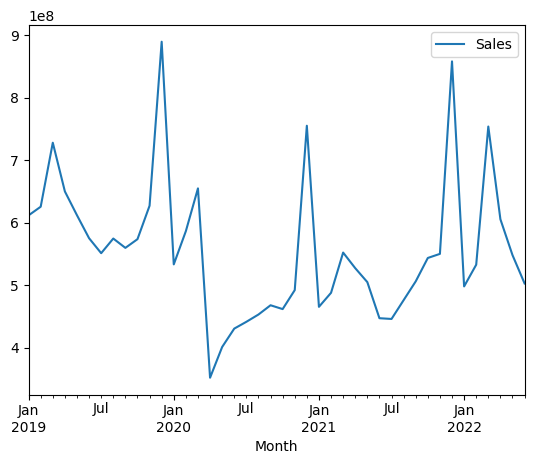

In [630]:
df.plot()

## График загруженных данных

In [644]:
adfuller(df['Sales'])

(-4.821488413501406,
 4.946542437323099e-05,
 0,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 1245.739920785457)

In [645]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ['Статистика теста ADF', 'P-значение', 'Используемые лаги', 'Критерий ADF']
    
    for value, label in zip(result, labels):
        print(f'{label}, {value}')

    if result[1]<=0.05:
        print('Данные стационарны')
    else:
        print('Данные не стационарны')

In [646]:
adfuller_test(df['Sales'])

Статистика теста ADF, -4.821488413501406
P-значение, 4.946542437323099e-05
Используемые лаги, 0
Критерий ADF, 41
Данные стационарны


In [647]:
df

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
2019-01-01,6.116698e+08,NaN,NaN
2019-02-01,6.254852e+08,1.381540e+07,NaN
2019-03-01,7.278651e+08,1.023798e+08,NaN
2019-04-01,6.499091e+08,-7.795598e+07,NaN
2019-05-01,6.118044e+08,-3.810472e+07,NaN
2019-06-01,5.750736e+08,-3.673080e+07,NaN
2019-07-01,5.511557e+08,-2.391781e+07,NaN
2019-08-01,5.745834e+08,2.342769e+07,NaN
2019-09-01,5.596533e+08,-1.493012e+07,NaN


In [649]:
df['Sales'].shift(1)

Month
2019-01-01             NaN
2019-02-01    6.116698e+08
2019-03-01    6.254852e+08
2019-04-01    7.278651e+08
2019-05-01    6.499091e+08
2019-06-01    6.118044e+08
2019-07-01    5.750736e+08
2019-08-01    5.511557e+08
2019-09-01    5.745834e+08
2019-10-01    5.596533e+08
2019-11-01    5.735714e+08
2019-12-01    6.270833e+08
2020-01-01    8.893998e+08
2020-02-01    5.332384e+08
2020-03-01    5.864687e+08
2020-04-01    6.548460e+08
2020-05-01    3.519605e+08
2020-06-01    4.011334e+08
2020-07-01    4.305238e+08
2020-08-01    4.413847e+08
2020-09-01    4.530366e+08
2020-10-01    4.678771e+08
2020-11-01    4.617411e+08
2020-12-01    4.920891e+08
2021-01-01    7.550166e+08
2021-02-01    4.653435e+08
2021-03-01    4.877776e+08
2021-04-01    5.521452e+08
2021-05-01    5.271996e+08
2021-06-01    5.048700e+08
2021-07-01    4.471601e+08
2021-08-01    4.459584e+08
2021-09-01    4.760269e+08
2021-10-01    5.060857e+08
2021-11-01    5.435085e+08
2021-12-01    5.500617e+08
2022-01-01    8.579605

In [650]:
df['Sales first diff.'] = df['Sales'] - df['Sales'].shift(1)

In [651]:
df.head()

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
2019-01-01,6.116698e+08,NaN,NaN
2019-02-01,6.254852e+08,1.381540e+07,NaN
2019-03-01,7.278651e+08,1.023798e+08,NaN
2019-04-01,6.499091e+08,-7.795598e+07,NaN
2019-05-01,6.118044e+08,-3.810472e+07,NaN


In [652]:
df['Seasonal first diff.'] = df['Sales'] - df['Sales'].shift(12)

In [653]:
df.head()

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
2019-01-01,6.116698e+08,NaN,NaN
2019-02-01,6.254852e+08,1.381540e+07,NaN
2019-03-01,7.278651e+08,1.023798e+08,NaN
2019-04-01,6.499091e+08,-7.795598e+07,NaN
2019-05-01,6.118044e+08,-3.810472e+07,NaN


In [654]:
adfuller_test(df['Seasonal first diff.'].dropna())

Статистика теста ADF, -2.097711671011186
P-значение, 0.24543574514074784
Используемые лаги, 0
Критерий ADF, 29
Данные не стационарны


## Seasonal first diff

Text(0, 0.5, 'Seasonal first diff')

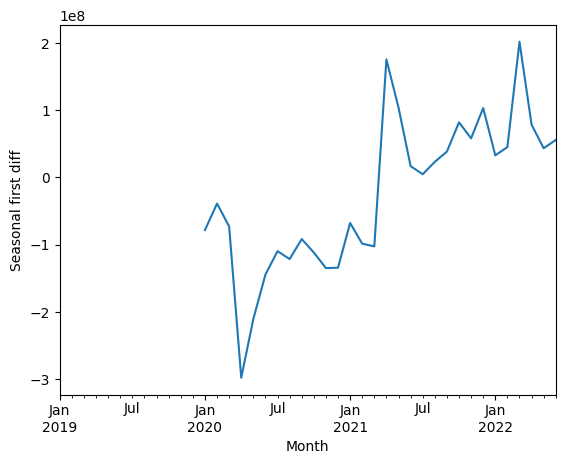

In [661]:
df['Seasonal first diff.'].plot()
plt.ylabel('Seasonal first diff')

In [662]:
df.head(15)

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
2019-01-01,6.116698e+08,NaN,NaN
2019-02-01,6.254852e+08,1.381540e+07,NaN
2019-03-01,7.278651e+08,1.023798e+08,NaN
2019-04-01,6.499091e+08,-7.795598e+07,NaN
2019-05-01,6.118044e+08,-3.810472e+07,NaN
2019-06-01,5.750736e+08,-3.673080e+07,NaN
2019-07-01,5.511557e+08,-2.391781e+07,NaN
2019-08-01,5.745834e+08,2.342769e+07,NaN
2019-09-01,5.596533e+08,-1.493012e+07,NaN


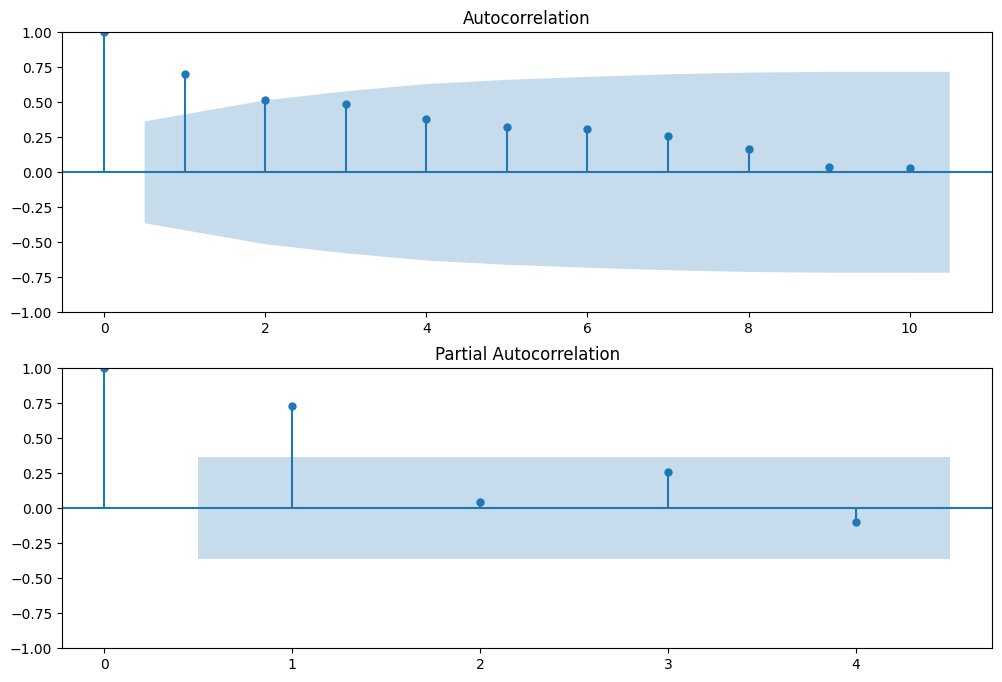

In [677]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal first diff.'].iloc[13:], lags=10, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal first diff.'].iloc[13:], lags=4, ax=ax2)

In [678]:
model = ARIMA(df['Sales'], order=(1,1,1))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [679]:
model = model.fit()

In [680]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -568.867
Date:                            Fri, 28 Apr 2023   AIC                           1147.734
Time:                                    21:41:58   BIC                           1154.571
Sample:                                01-01-2019   HQIC                          1149.875
                                     - 06-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0650      1.277      0.051      0.959      -2.438       2.568
ma.L1         -0.1451      1.251     -0.116      0.908      -2.596       2.306
ar.S.L12      -0.1967      0.581     -0.339      0.735      -1.335       0.941
ma.S.L12       0.0540      0.609      0.089      0.929      -1.140       1.248
sigma2      5.661e+15        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                15.43
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             0.31
Prob(H) (two-sided):                  0.38   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.56e+48. Standard errors may be unstable.
"""

In [681]:
df.shape

(42, 5)

In [682]:
# df['forecast'] = model.predict(start=35, end=42, dynamic=True)

In [683]:
# df.tail(20)

In [684]:
# df[['Sales', 'forecast']].plot(figsize=(12,8))

## Построение модели SARIMA

In [685]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

In [686]:
results = model.fit()

In [687]:
df['forecast_SARIMAX'] = results.predict(start=20, end=42, dynamic=True)

In [688]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
Month,,,,,
2020-11-01,4.920891e+08,3.034795e+07,-1.349943e+08,NaN,4.981696e+08
2020-12-01,7.550166e+08,2.629275e+08,-1.343832e+08,NaN,7.224427e+08
2021-01-01,4.653435e+08,-2.896731e+08,-6.789488e+07,NaN,5.092177e+08
2021-02-01,4.877776e+08,2.243407e+07,-9.869116e+07,NaN,5.569276e+08
2021-03-01,5.521452e+08,6.436765e+07,-1.027008e+08,NaN,6.309547e+08
2021-04-01,5.271996e+08,-2.494566e+07,1.752391e+08,NaN,3.595793e+08
2021-05-01,5.048700e+08,-2.232959e+07,1.037366e+08,NaN,3.959949e+08
2021-06-01,4.471601e+08,-5.770991e+07,1.663631e+07,NaN,4.156593e+08
2021-07-01,4.459584e+08,-1.201634e+06,4.573786e+06,NaN,4.213687e+08


<Axes: xlabel='Month'>

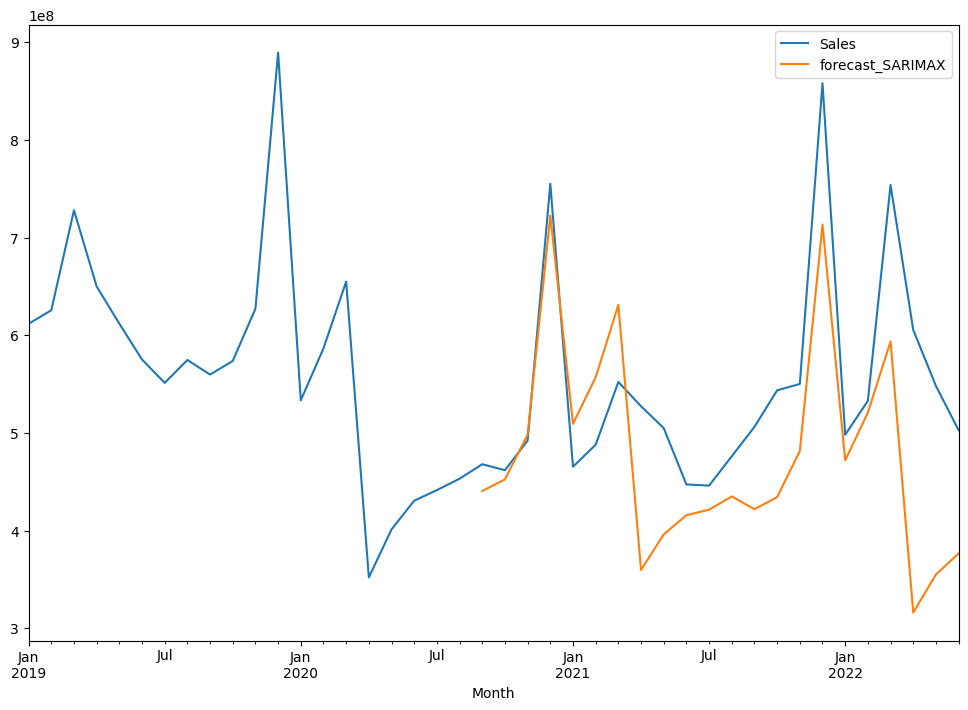

In [689]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,8))

## На графике видим, что модель SARIMAX показывает довольно точный прогноз, но видны расхождения

## Строим прогноз на будущие периоды

In [690]:
future_dates = [df.index[-1] + DateOffset(months=x)for x in range(0,3)]

In [691]:
future_dates[1:]

[Timestamp('2022-07-01 00:00:00'), Timestamp('2022-08-01 00:00:00')]

In [692]:
future_dataset = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [693]:
future_dataset.tail()

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
2022-07-01,NaN,NaN,NaN,NaN,NaN
2022-08-01,NaN,NaN,NaN,NaN,NaN


In [694]:
future_df = pd.concat([df, future_dataset])

In [695]:
future_df.shape

(44, 5)

In [696]:
future_df['forecast_SARIMAX2'] = results.predict(start=41, end=44, dynamic=True)

<Axes: >

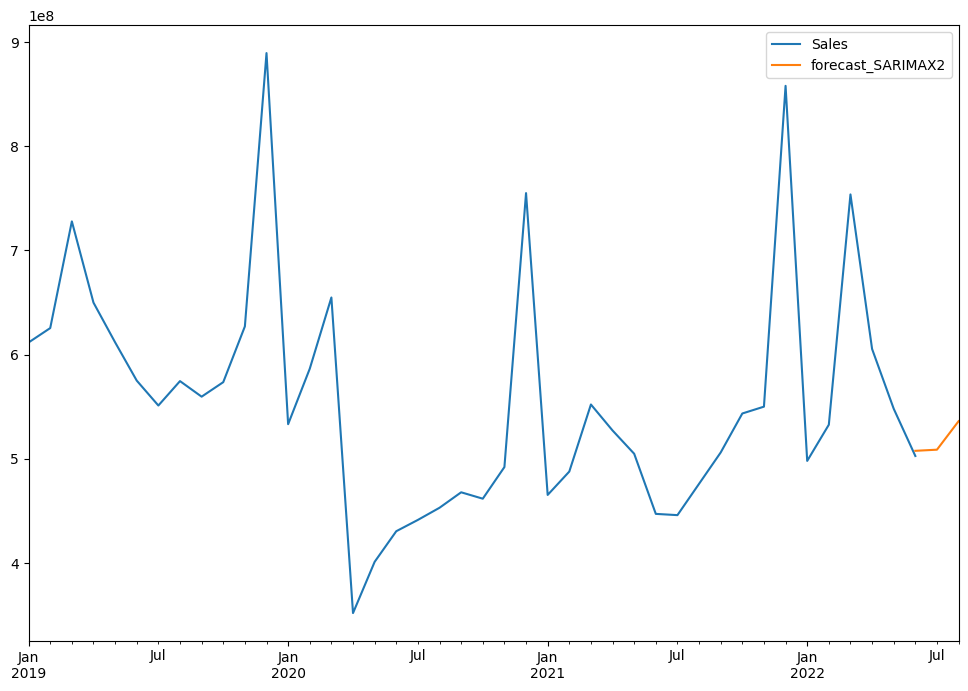

In [697]:
future_df[['Sales', 'forecast_SARIMAX2']].plot(figsize=(12,8))

## Построение прогноза на 07 и 08 месяцы 2022г.

<Axes: >

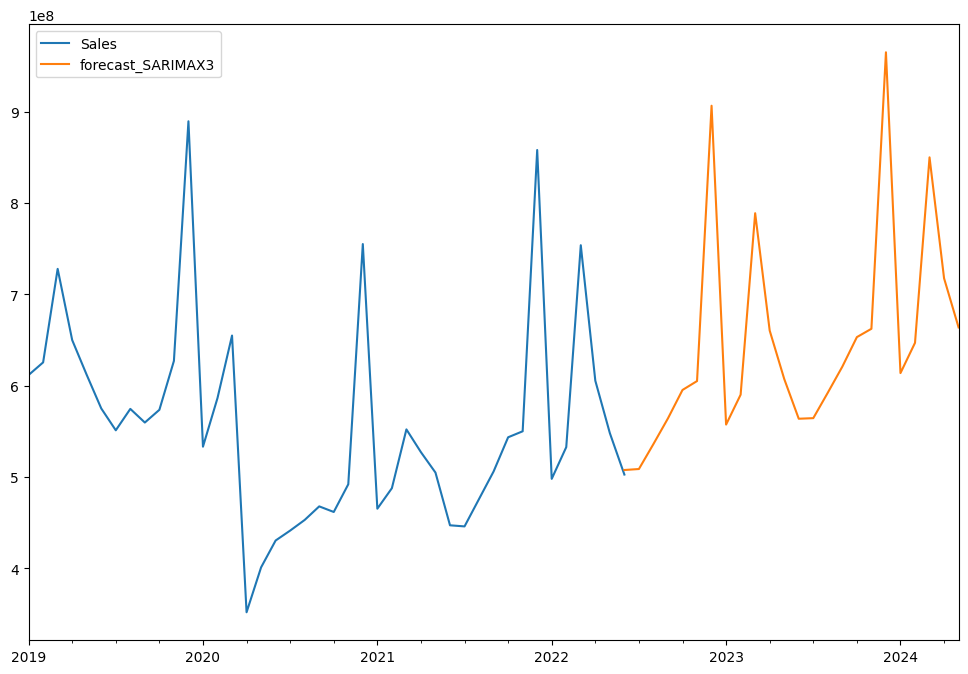

In [706]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 24)]
future_dates[1:]
future_dataset = pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_dataset.tail()
future_df = pd.concat([df, future_dataset])
future_df.shape
future_df['forecast_SARIMAX3'] = results.predict(start=41, end=65, dynamic=True)
future_df[['Sales', 'forecast_SARIMAX3']].plot(figsize=(12, 8))

## Бонус! Построение прогноза на последующие 2 года! =)

## Итог для построения прогноза была выбрана модель SARIMAX. Её преимущество перед ARIMA состоит  в том, что она учитывает данные с внешними факторами (сезонность, праздники и тд.)